In [36]:
# impoting the libraries fro the data collection using nasa api
import pandas as pd
import requests 
import json
from dotenv import load_dotenv 
import os
from io import BytesIO
from PIL import Image

* APOD
- One of the most popular websites at NASA is the Astronomy Picture of the Day.
In fact, this website is one of the most popular websites across all federal agencies. It has the popular appeal of a Justin Bieber video. This endpoint structures the APOD imagery and associated metadata so that it can be repurposed for other applications. In addition, if the concept_tags parameter is set to True, then keywords derived from the image explanation are returned. These keywords could be used as auto-generated hashtags for twitter or instagram feeds; but generally help with discoverability of relevant imagery.

The full documentation for this API can be found in the APOD API Github repository.

In [15]:
def get_api(f="api.txt"):
    file = open(f,'r')
    return file.read()

In [18]:
def get_request():
    api = get_api()
    url = f"https://api.nasa.gov/planetary/apod?api_key={api}"
    reques= requests.get(url)
    print(reques.status_code) 
    return reques

In [19]:
get_request()

200


<Response [200]>

In [24]:
def convert_to_json():
    json_file = get_request()
    file_ = json_file.json()
    return file_

In [25]:
convert_to_json()

200


{'copyright': 'Xingyang Cai',
 'date': '2024-10-19',
 'explanation': "These six panels follow daily apparitions of comet C/2023 A3 Tsuchinshan-ATLAS as it moved away from our fair planet during the past week. The images were taken with the same camera and lens at the indicated dates and locations from California, planet Earth. At far right on October 12 the visitor from the distant Oort cloud was near its closest approach, some 70 million kilometers (about 4 light-minutes) away. Its bright coma and long dust tail were close on the sky to the setting Sun but still easy to spot against a bright western horizon. Over the following days, the outbound comet steadily climbs above the ecliptic and north into the darker western evening sky, but begins to fade from view. Crossing the Earth's orbital plane around October 14, Tsuchinshan-ATLAS exhibits a noticeable antitail extended toward the western horizon. Higher in the evening sky at sunset by October 17 (far left) the comet has faded and re

In [29]:
def convert_to_Df():
    json_doc = convert_to_json()
    df = pd.DataFrame([json_doc])
    return  df

In [30]:
convert_to_Df()

200


copyright        date  \
0  Xingyang Cai  2024-10-19   

                                         explanation  \
0  These six panels follow daily apparitions of c...   

                                               hdurl media_type  \
0  https://apod.nasa.gov/apod/image/2410/C2023A3-...      image   

  service_version                              title  \
0              v1  Comet Tsuchinshan-ATLAS Flys Away   

                                                 url  
0  https://apod.nasa.gov/apod/image/2410/C2023A3-...

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
from IPython.display import display 

In [45]:
def image_display():
   df = convert_to_Df()  
   img_url = df['hdurl'].iloc[0]  # Get the first image URL  
   response = requests.get(img_url)  
   img = Image.open(BytesIO(response.content))  
   return display(img)

200


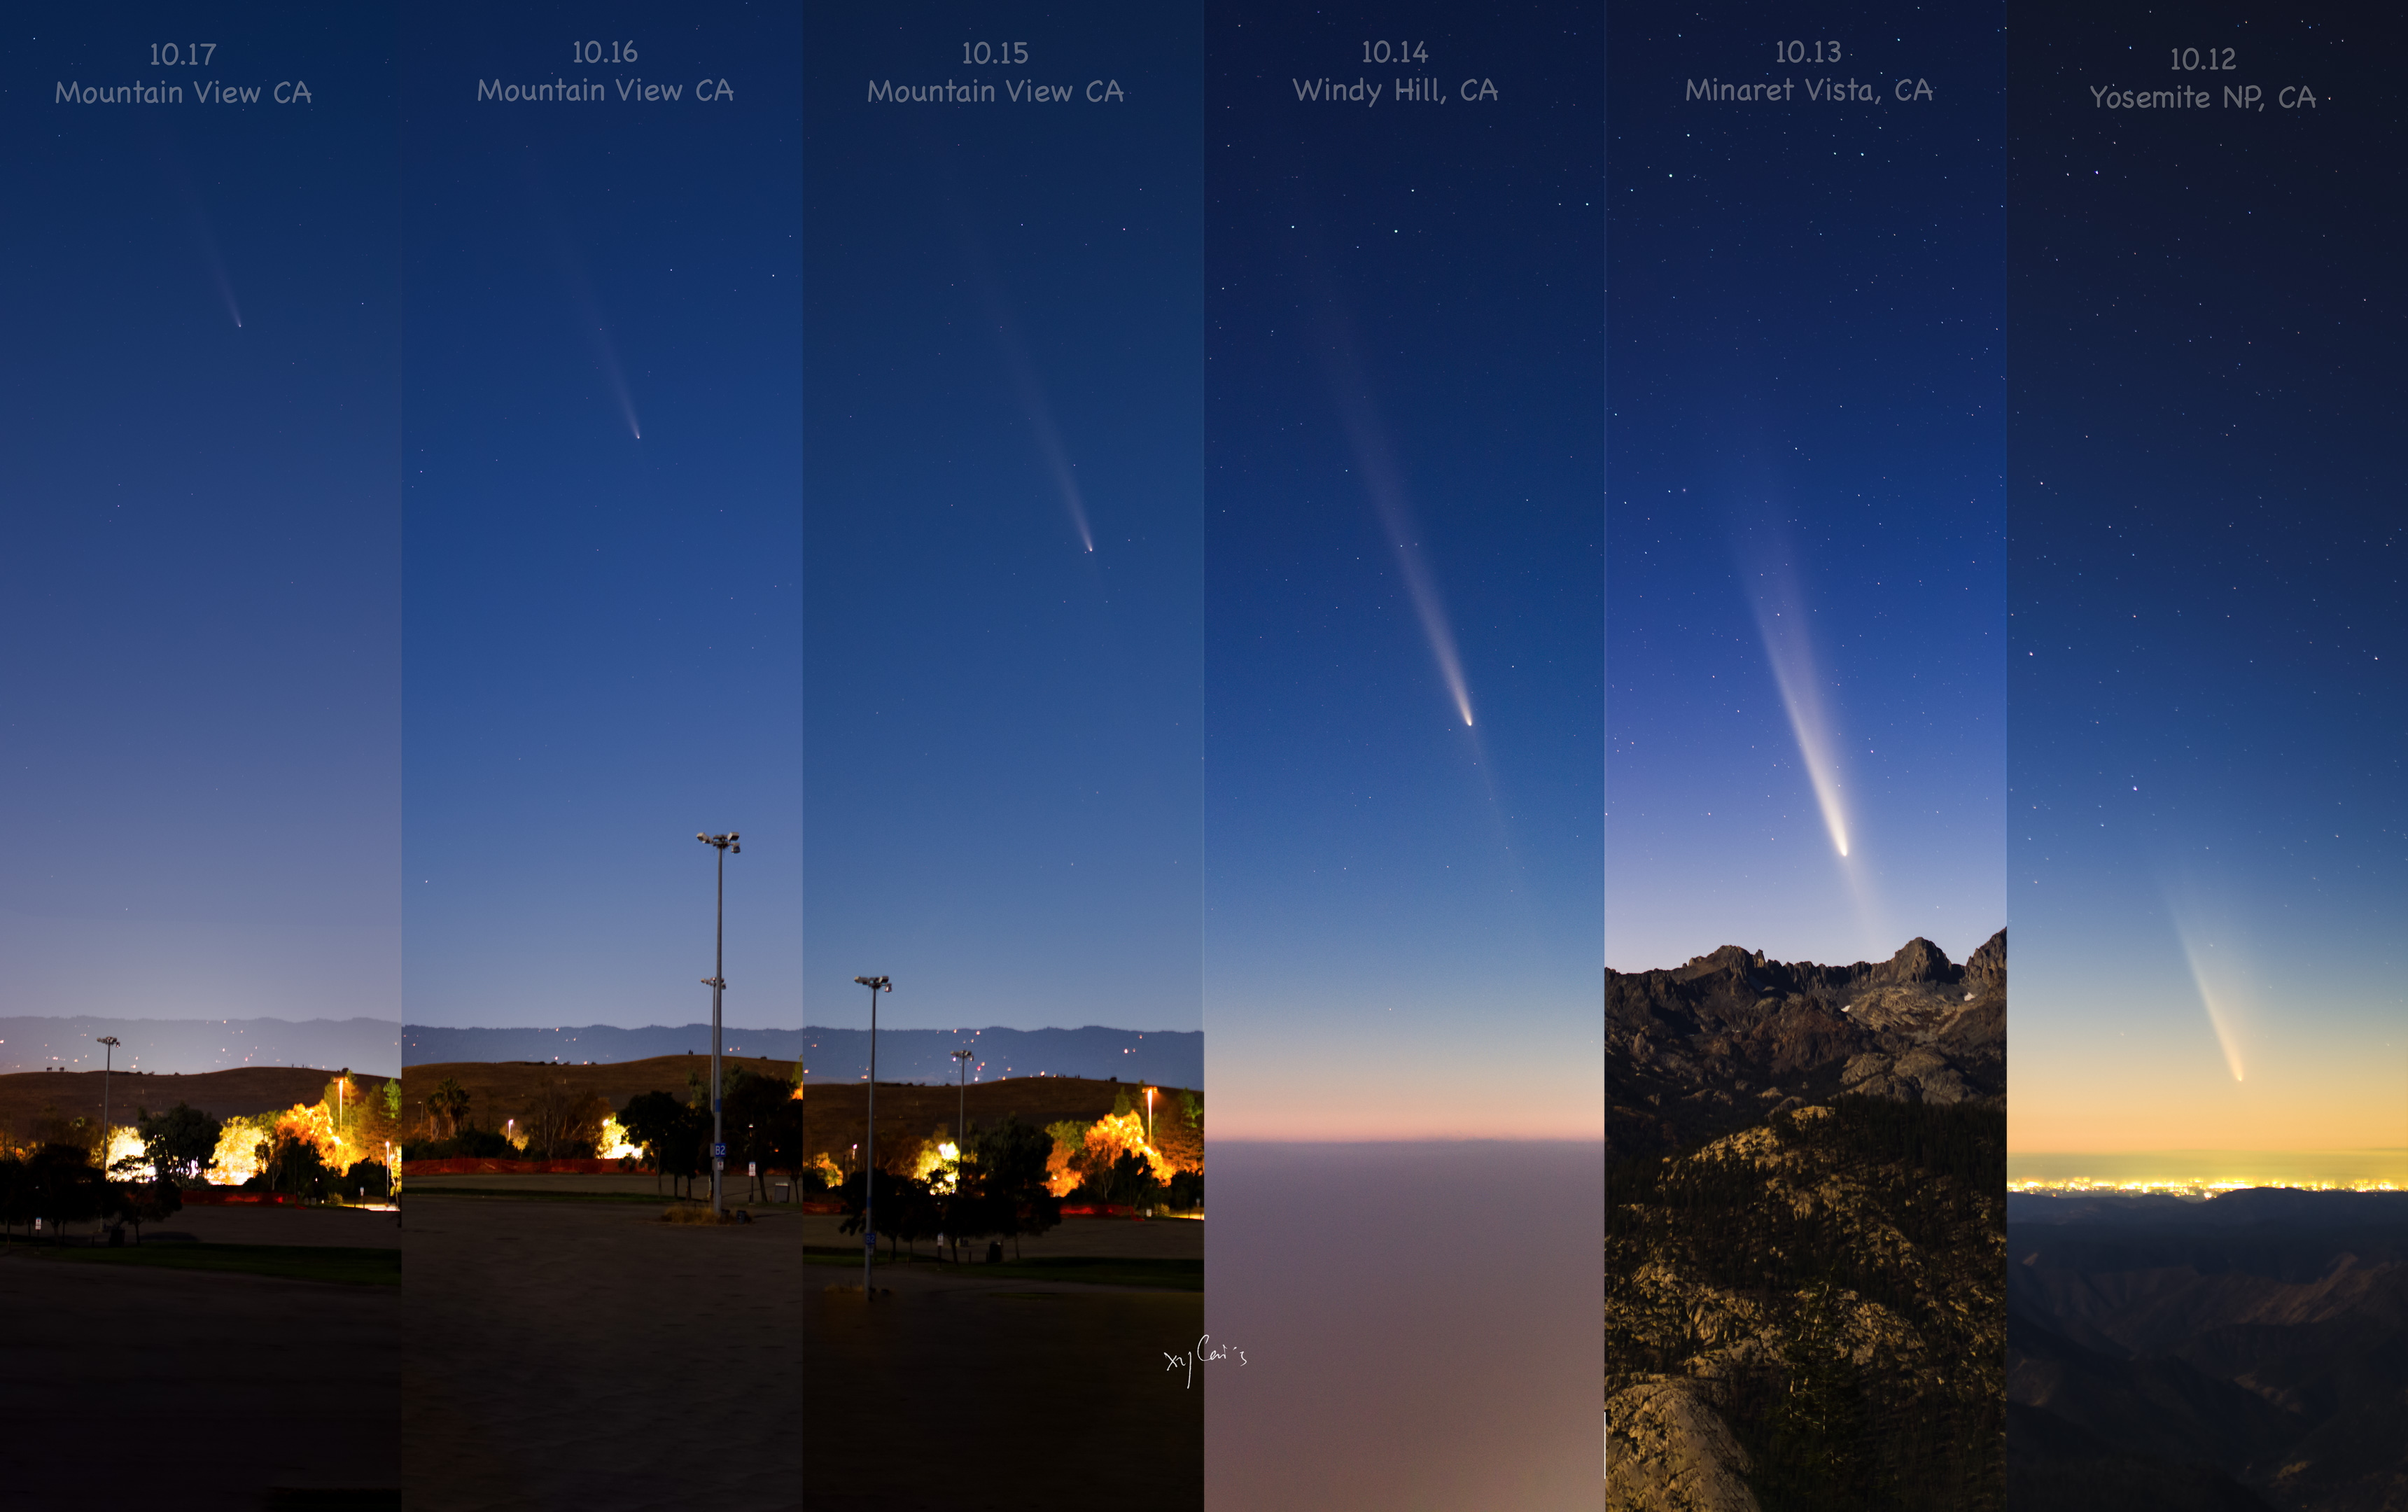

In [46]:
image_display()